## DATASET DE DIABETES


Librerias a usar:

In [395]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Lectura del dataframe y manejo de datos sobresalientes:

In [396]:

DataFrame = pd.read_csv('diabetes.csv')


display(DataFrame.head())
display(DataFrame.describe())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Revisar Outliers del data set

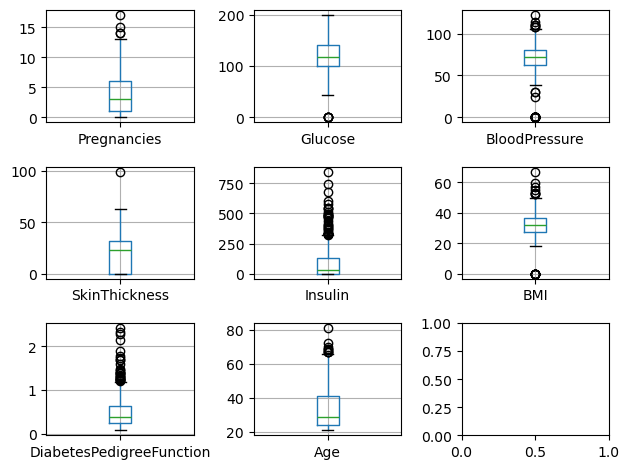

In [397]:
fig, axes = plt.subplots(3,3) # create figure and axes


for i,el in enumerate(list(DataFrame.columns.values)[:-1]):
    a = DataFrame.boxplot(el, ax=axes.flatten()[i], figsize= [20,20],grid=True,)


plt.tight_layout() 

plt.show()


Manejo de Outliers, usando el rango intercuartílico

In [398]:
q1 = DataFrame.quantile(0.25)
q3 = DataFrame.quantile(0.75)

iqr = q3-q1
outliers = ((DataFrame < (q1 - 1.5 * iqr)) | (DataFrame > (q3 + 1.5 * iqr)))

indices = outliers.any(axis=1)

DataFrame = DataFrame[~indices]
display(DataFrame)
display(DataFrame.describe())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


Cambio de 0's de los datos faltantes

In [399]:
#      Pregnancies   Glucose   BloodPressure  SkinThickness     insulin         BMI          DPF        Age 
#mean	3.804382	119.112676	72.120501	  20.563380	        65.931142	32.00579	0.429177	32.715180	0.312989


#llena los espacios vacios con la media de la columna
DataFrame.loc[DataFrame['Pregnancies'] == 0, 'Pregnancies'] = int(3.804382)
DataFrame.loc[DataFrame['Glucose'] == 0, 'Glucose'] = 119.11267
DataFrame.loc[DataFrame['BloodPressure'] == 0, 'BloodPressure'] = 72.120501
DataFrame.loc[DataFrame['SkinThickness'] == 0, 'SkinThickness'] = 20.563380
DataFrame.loc[DataFrame['Insulin'] == 0, 'Insulin'] = 65.931142	
DataFrame.loc[DataFrame['BMI'] == 0, 'BMI'] = 32.00579	
DataFrame.loc[DataFrame['DiabetesPedigreeFunction'] == 0, 'DiabetesPedigreeFunction'] = 0.429177
DataFrame.loc[DataFrame['Age'] == 0, 'Age'] = int(32.715180)	

display(DataFrame.head())

C:\Users\Javier Rivera\AppData\Local\Temp\ipykernel_11148\1315739601.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '119.11267' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  DataFrame.loc[DataFrame['Glucose'] == 0, 'Glucose'] = 119.11267
C:\Users\Javier Rivera\AppData\Local\Temp\ipykernel_11148\1315739601.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.120501' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  DataFrame.loc[DataFrame['BloodPressure'] == 0, 'BloodPressure'] = 72.120501
C:\Users\Javier Rivera\AppData\Local\Temp\ipykernel_11148\1315739601.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20.56338' has dtype incompatible with int64, ple

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,65.931142,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,65.931142,26.6,0.351,31,0
2,8,183.0,64.0,20.56338,65.931142,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.56338,65.931142,25.6,0.201,30,0


Correlacion entre los datos:


In [400]:
corr_matrix = DataFrame.corr(numeric_only= True)
corr_matrix[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age' ]].mean()

Pregnancies                 0.262540
Glucose                     0.319796
BloodPressure               0.281948
SkinThickness               0.267699
Insulin                     0.246359
BMI                         0.315767
DiabetesPedigreeFunction    0.194784
Age                         0.287859
dtype: float64

Estadística General de los Datos a usar:


In [401]:
DataFrame.describe().map(lambda x: f"{x:0.2f}").T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,639.00,4.22,2.93,1.00,2.00,3.00,6.00,13.00
Glucose,639.00,119.11,29.16,44.00,99.00,114.00,137.00,198.00
BloodPressure,639.00,72.12,11.35,38.00,64.00,72.00,80.00,106.00
SkinThickness,639.00,26.32,9.13,7.00,20.56,23.00,32.00,60.00
Insulin,639.00,97.61,56.87,15.00,65.93,65.93,120.00,318.00
BMI,639.00,32.01,6.43,18.20,27.30,32.00,35.95,50.00
DiabetesPedigreeFunction,639.00,0.43,0.25,0.08,0.24,0.36,0.59,1.19
Age,639.00,32.72,11.08,21.00,24.00,29.00,40.00,66.00
Outcome,639.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00


Boxplot luego de aplicar rango intercuartílico

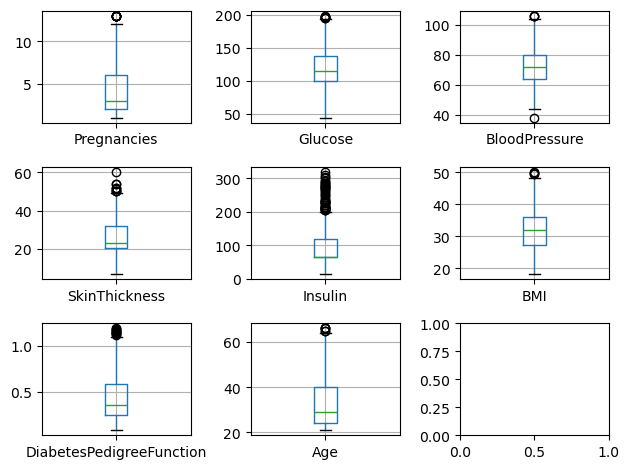

In [402]:
fig, axes = plt.subplots(3,3) # create figure and axes


for i,el in enumerate(list(DataFrame.columns.values)[:-1]):
    a = DataFrame.boxplot(el, ax=axes.flatten()[i], figsize= [20,20],grid=True,)


plt.tight_layout() 

plt.show()

Gráfico de las columnas:

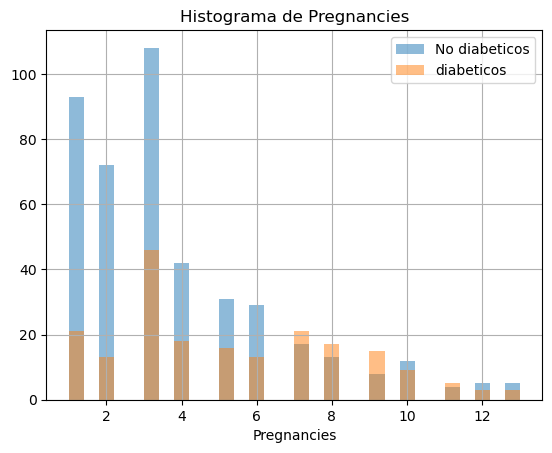

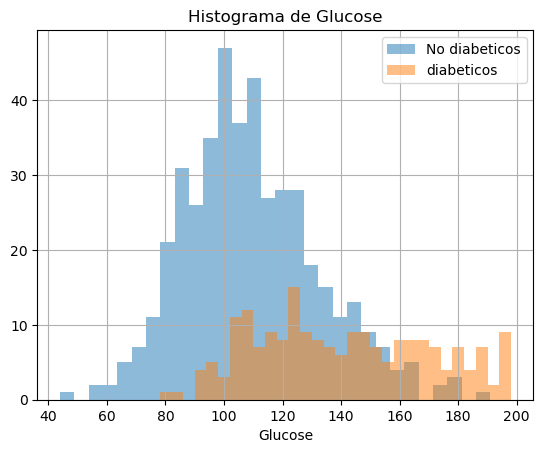

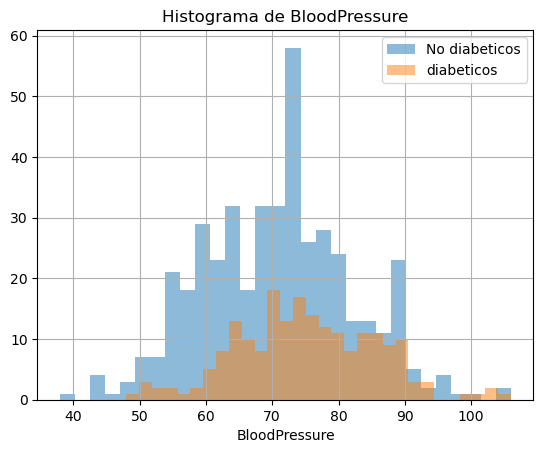

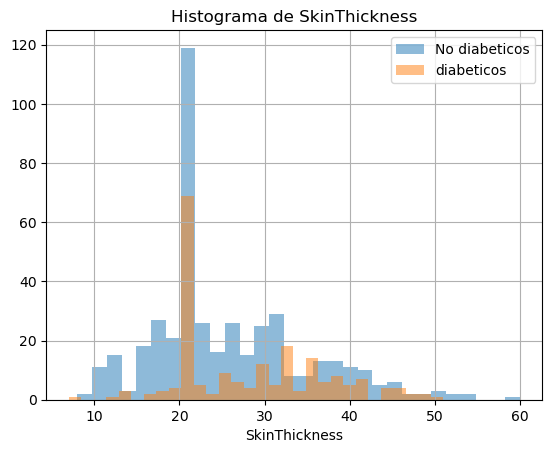

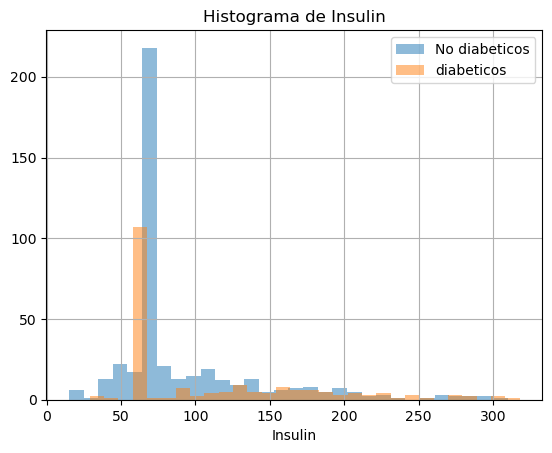

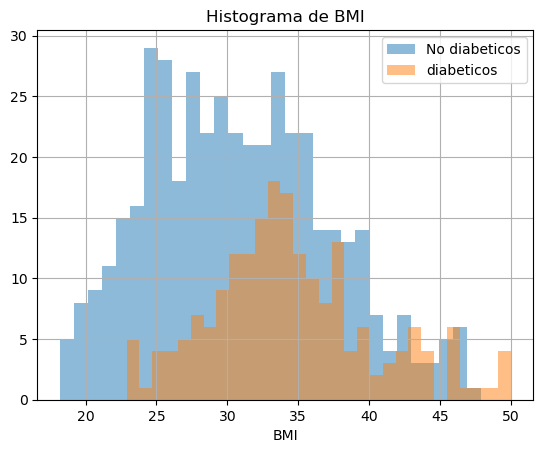

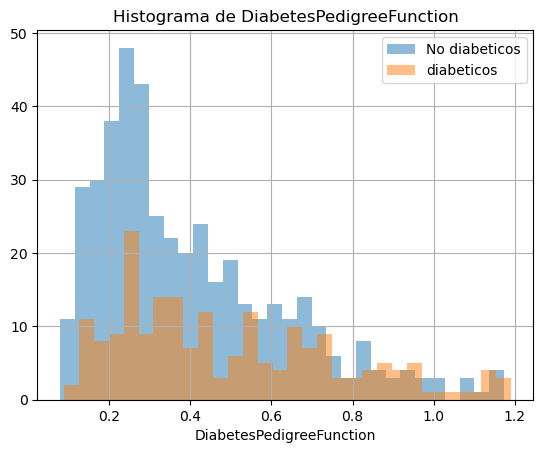

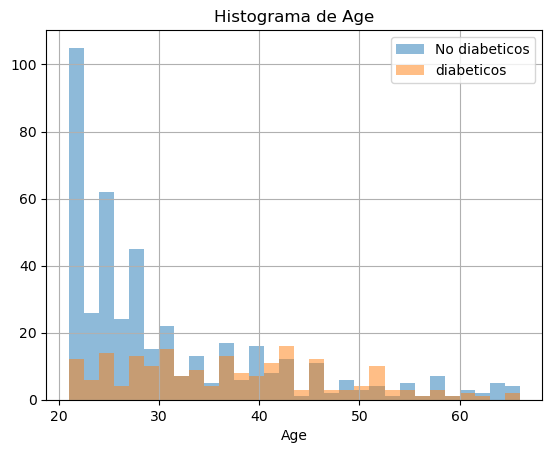

In [403]:
def plot_numerical_col(dataframe, numerical_col):
    groups = DataFrame.groupby('Outcome')
    
    plt.hist(groups[numerical_col].get_group(0), bins=30, alpha=0.5, label='No diabeticos',)
    plt.hist(groups[numerical_col].get_group(1), bins=30, alpha=0.5, label='diabeticos',)
    plt.grid(True)
    plt.title('Histograma de '+ str(numerical_col))
    plt.xlabel("Personas")
    plt.xlabel(numerical_col)
    plt.legend(prop ={'size': 10})

    plt.show(block=True)

cols = [col for col in DataFrame.columns if "Outcome" not in col]


for col in cols:
    plot_numerical_col(DataFrame, col)

Cantidad de muestras con glucosa(1) y sin glucosa(0)

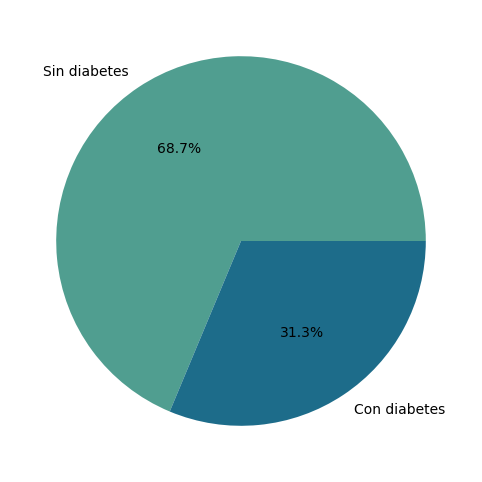

In [404]:
outcomes = DataFrame['Outcome'].value_counts()

palette = sns.color_palette("crest", len(outcomes))

label = [ "Sin diabetes", "Con diabetes"]
plt.figure(figsize=(8,6))
plt.pie(outcomes, labels= label, colors=palette, autopct='%1.1f%%')
plt.show()

Gráficos de Dispersión

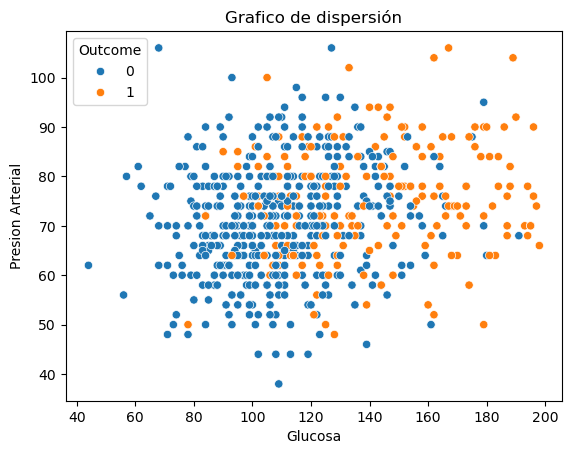

In [405]:
sns.scatterplot(data=DataFrame, x="Glucose", y="BloodPressure", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Glucosa")
plt.ylabel("Presion Arterial")
plt.show()

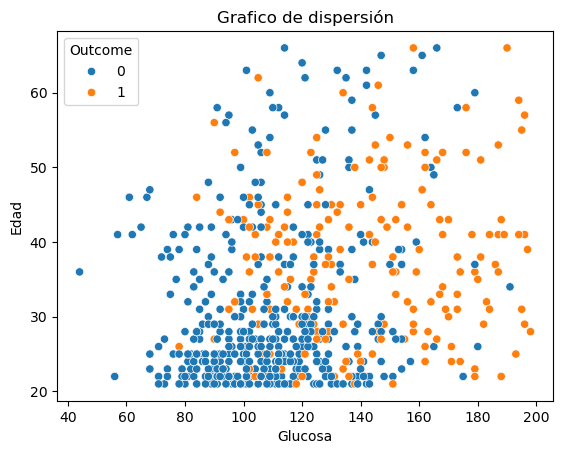

In [406]:
sns.scatterplot(data=DataFrame, x="Glucose", y="Age", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Glucosa")
plt.ylabel("Edad")
plt.show()

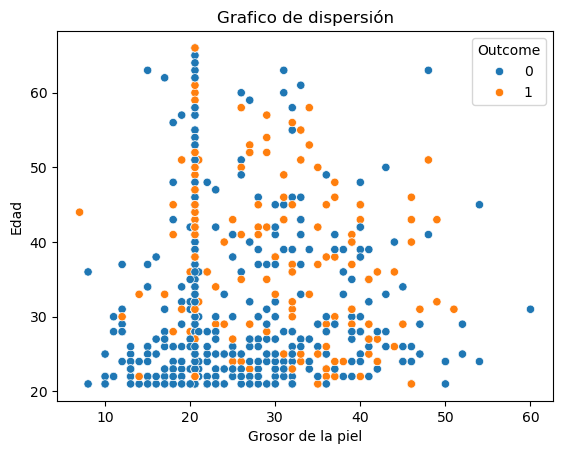

In [407]:
sns.scatterplot(data=DataFrame, x="SkinThickness", y="Age", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Grosor de la piel")
plt.ylabel("Edad")
plt.show()

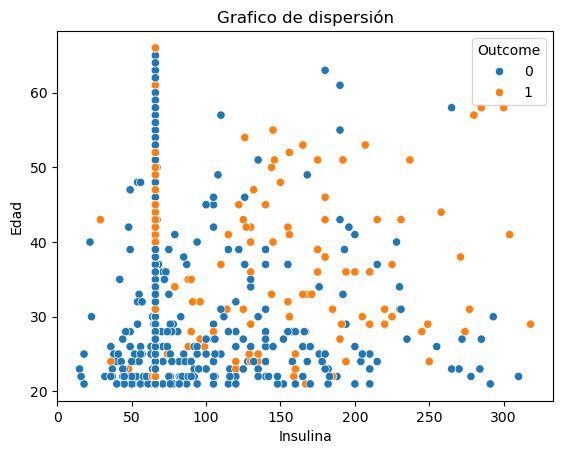

In [408]:
sns.scatterplot(data=DataFrame, x="Insulin", y="Age", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Insulina")
plt.ylabel("Edad")
plt.show()

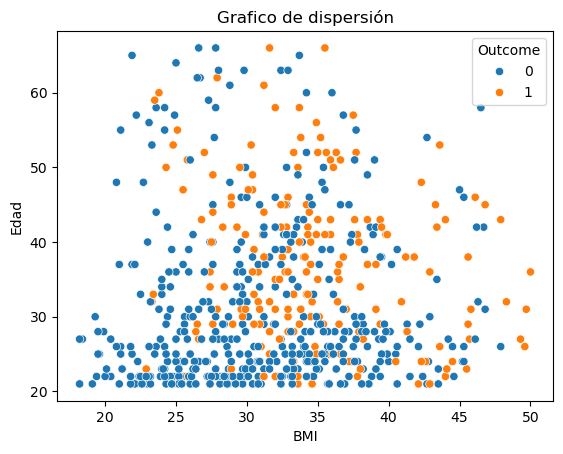

In [409]:
sns.scatterplot(data=DataFrame, x="BMI", y="Age", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("BMI")
plt.ylabel("Edad")
plt.show()

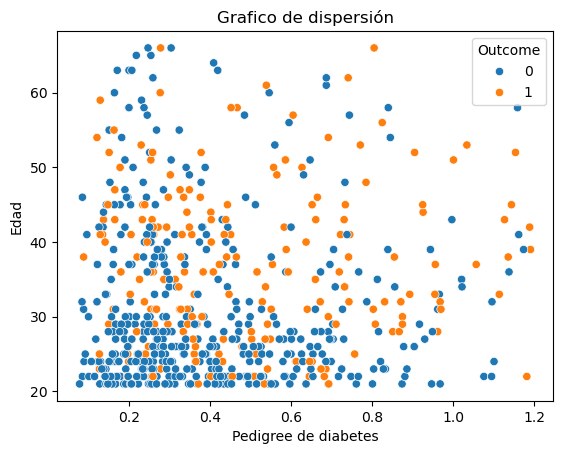

In [410]:
sns.scatterplot(data=DataFrame, x="DiabetesPedigreeFunction", y="Age", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Pedigree de diabetes")
plt.ylabel("Edad")
plt.show()

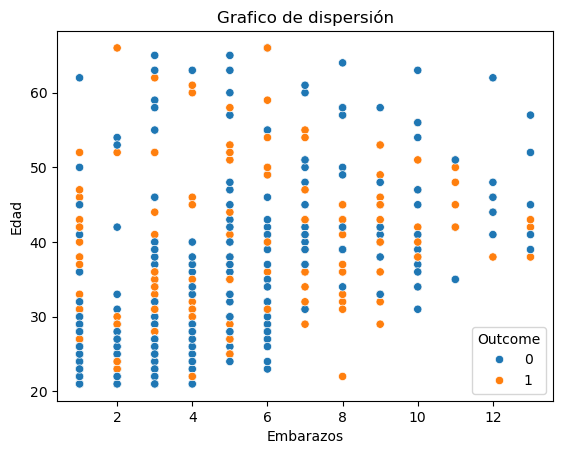

In [411]:
sns.scatterplot(data=DataFrame, x="Pregnancies", y="Age", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Embarazos")
plt.ylabel("Edad")
plt.show()

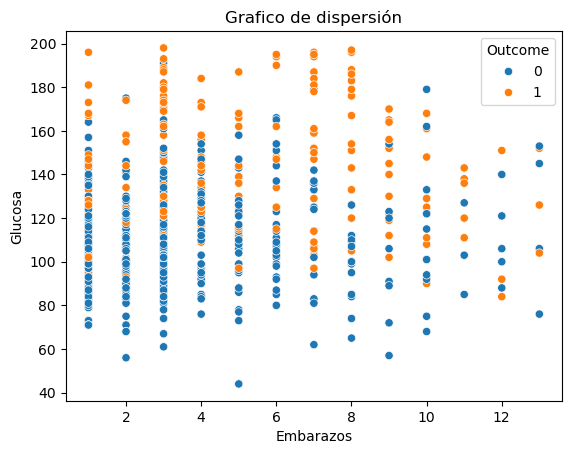

In [412]:
sns.scatterplot(data=DataFrame, x="Pregnancies", y="Glucose", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Embarazos")
plt.ylabel("Glucosa")
plt.show()

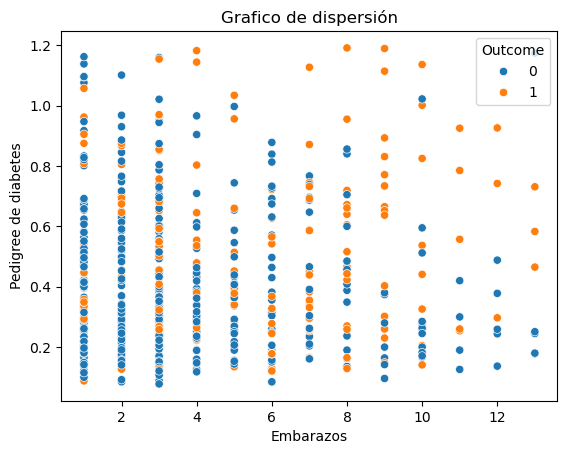

In [413]:
sns.scatterplot(data=DataFrame, x="Pregnancies", y="DiabetesPedigreeFunction", hue= 'Outcome')
plt.title("Grafico de dispersión")
plt.xlabel("Embarazos")
plt.ylabel("Pedigree de diabetes")
plt.show()

Division de los datos en Training, Testing y validación


In [414]:

#DataFrame= DataFrame.sample(frac=1)  #baraja el dataframe
ratio=0.70 # 70% del dataset


total_rows = DataFrame.shape[0]
train_size = int(total_rows * ratio)


DataFrameTraining = DataFrame[0:train_size]

#dataframe a testear

#Guarda el 30% restante
DataFrameExtra = DataFrame[train_size:] 


ratio = 0.50

total_rows = DataFrameExtra.shape[0]
testing_size = int(total_rows * ratio)

DataFrameTesting = DataFrameExtra[0:testing_size]
DataFrameValidation = DataFrameExtra[testing_size:]

display(DataFrameTraining)
display(DataFrameTesting)
display(DataFrameValidation)



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,65.931142,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,65.931142,26.6,0.351,31,0
2,8,183.0,64.0,20.56338,65.931142,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.56338,65.931142,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
538,3,127.0,80.0,37.00000,210.000000,36.3,0.804,23,0
539,3,129.0,92.0,49.00000,155.000000,36.4,0.968,32,1
540,8,100.0,74.0,40.00000,215.000000,39.4,0.661,43,1
541,3,128.0,72.0,25.00000,190.000000,32.4,0.549,27,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
543,4,84.0,90.0,23.00000,56.000000,39.5,0.159,25,0
544,1,88.0,78.0,29.00000,76.000000,32.0,0.365,29,0
545,8,186.0,90.0,35.00000,225.000000,34.5,0.423,37,1
546,5,187.0,76.0,27.00000,207.000000,43.6,1.034,53,1
547,4,131.0,68.0,21.00000,166.000000,33.1,0.160,28,0
...,...,...,...,...,...,...,...,...,...
651,1,117.0,60.0,23.00000,106.000000,33.8,0.466,27,0
652,5,123.0,74.0,40.00000,77.000000,34.1,0.269,28,0
653,2,120.0,54.0,20.56338,65.931142,26.8,0.455,27,0
654,1,106.0,70.0,28.00000,135.000000,34.2,0.142,22,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
657,1,120.0,80.0,48.00000,200.000000,38.9,1.162,41,0
658,11,127.0,106.0,20.56338,65.931142,39.0,0.190,51,0
660,10,162.0,84.0,20.56338,65.931142,27.7,0.182,54,0
662,8,167.0,106.0,46.00000,231.000000,37.6,0.165,43,1
663,9,145.0,80.0,46.00000,130.000000,37.9,0.637,40,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,65.931142,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.56338,65.931142,30.1,0.349,47,1


Division en x_train, y_train, x_test, y_test

In [415]:
def divideData(dfTraining,dfTesting, dfValidation):
    x_train = dfTraining[['Pregnancies','Glucose',
    'BloodPressure','SkinThickness','Insulin',
    'BMI','DiabetesPedigreeFunction','Age']].values
    
    y_train = dfTraining['Outcome']
    
    x_test = dfTesting[['Pregnancies','Glucose',
    'BloodPressure','SkinThickness','Insulin',
    'BMI','DiabetesPedigreeFunction','Age']].values
    
    y_test = dfTesting['Outcome']
    
    x_val = dfValidation[['Pregnancies','Glucose',
    'BloodPressure','SkinThickness','Insulin',
    'BMI','DiabetesPedigreeFunction','Age']].values
    
    y_val = dfValidation['Outcome']
    
    return  x_train, y_train, x_test, y_test, x_val, y_val
    
x_train, y_train, x_test, y_test, x_val, y_val  = divideData(DataFrameTraining,DataFrameTesting,DataFrameValidation) 


## KNN del Dataset Diabetes

In [416]:

results = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_score = cross_val_score(knn, x_train,y_train,cv=5)
    #print("Cross-validation scores:", cv_score)
    knn.fit(x_train, y_train)
    predic = knn.predict(x_val)
    accuracy = accuracy_score(y_val, predic)
    precision = precision_score(y_val, predic)
    recall = recall_score(y_val, predic)
    f1 = f1_score(y_val, predic)
    matriz = confusion_matrix(y_val, predic)
    results.append({"k": i, "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "matriz":matriz, "validacion": cv_score.mean()})
    
#Se obtiene el resultado maximo de todos 
maxAccuracy = max(results, key = lambda x: x['accuracy'])
maxPrecision = max(results, key = lambda x: x['precision'])
maxRecall = max(results, key = lambda x: x['recall'])
maxF1 = max(results, key = lambda x: x['f1'])
maxCv = max(results, key = lambda x: x['validacion'])

print("Max Accuracy")
print(f"k = {maxAccuracy['k']} || Accuracy = {maxAccuracy['accuracy']} || Precision = {maxAccuracy['precision']} || Recall = {maxAccuracy['recall']} || F1 = {maxAccuracy['f1']} || validacion = {maxAccuracy['validacion']} ")

print("Max Precision")
print(f"k = {maxPrecision['k']} || Accuracy = {maxPrecision['accuracy']} || Precision = {maxPrecision['precision']} || Recall = {maxPrecision['recall']} || F1 = {maxPrecision['f1']} || validacion = {maxPrecision['validacion']}")

print("Max Recall")
print(f"k = {maxRecall['k']} || Accuracy = {maxRecall['accuracy']} || Precision = {maxRecall['precision']} || Recall = {maxRecall['recall']} || F1 = {maxRecall['f1']} || validacion = {maxRecall['validacion']}")

print("Max f1")
print(f"k = {maxF1['k']} || Accuracy = {maxF1['accuracy']} || Precision = {maxF1['precision']} || Recall = {maxF1['recall']} || F1 = {maxF1['f1']} || validacion = {maxF1['validacion']}")

print("Max Cv")
print(f"k = {maxCv['k']} || Accuracy = {maxCv['accuracy']} || Precision = {maxCv['precision']} || Recall = {maxCv['recall']} || F1 = {maxCv['f1']} || validacion = {maxCv['validacion']}")




Max Accuracy
k = 12 || Accuracy = 0.78125 || Precision = 0.8 || Recall = 0.5555555555555556 || F1 = 0.6557377049180327 || validacion = 0.7561298377028713 
Max Precision
k = 88 || Accuracy = 0.71875 || Precision = 0.9090909090909091 || Recall = 0.2777777777777778 || F1 = 0.425531914893617 || validacion = 0.6957053682896379
Max Recall
k = 3 || Accuracy = 0.7604166666666666 || Precision = 0.7096774193548387 || Recall = 0.6111111111111112 || F1 = 0.6567164179104478 || validacion = 0.7046941323345817
Max f1
k = 17 || Accuracy = 0.7708333333333334 || Precision = 0.7333333333333333 || Recall = 0.6111111111111112 || F1 = 0.6666666666666666 || validacion = 0.7427465667915107
Max Cv
k = 43 || Accuracy = 0.7083333333333334 || Precision = 0.7222222222222222 || Recall = 0.3611111111111111 || F1 = 0.48148148148148145 || validacion = 0.7651435705368289


Prueba con menos features

Se omiten las caracteristicas con menos correlación entre ellas para realizar mas pruebas 

In [417]:
def divideData(dfTraining,dfTesting, dfValidation):
    x_train = dfTraining[['Pregnancies','Glucose',
    'BloodPressure','SkinThickness','Insulin',
    'BMI','Age']].values
    
    y_train = dfTraining['Outcome']
    
    x_test = dfTesting[['Pregnancies','Glucose',
    'BloodPressure','SkinThickness','Insulin',
    'BMI','Age']].values
    
    y_test = dfTesting['Outcome']
    
    x_val = dfValidation[['Pregnancies','Glucose',
    'BloodPressure','SkinThickness','Insulin',
    'BMI','Age']].values
    
    y_val = dfValidation['Outcome']
    
    return  x_train, y_train, x_test, y_test, x_val, y_val
    
x_train, y_train, x_test, y_test, x_val, y_val  = divideData(DataFrameTraining,DataFrameTesting,DataFrameValidation) 


In [418]:

results = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_score = cross_val_score(knn, x_train,y_train,cv=5)
    #print("Cross-validation scores:", cv_score)
    
    knn.fit(x_train, y_train)
    predic = knn.predict(x_val)
    accuracy = accuracy_score(y_val, predic)
    precision = precision_score(y_val, predic)
    recall = recall_score(y_val, predic)
    f1 = f1_score(y_val, predic)
    matriz = confusion_matrix(y_val, predic)
    results.append({"k": i, "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "matriz":matriz, "validacion": cv_score.mean()})
    
#Se obtiene el resultado maximo de todos 
maxAccuracy = max(results, key = lambda x: x['accuracy'])
maxPrecision = max(results, key = lambda x: x['precision'])
maxRecall = max(results, key = lambda x: x['recall'])
maxF1 = max(results, key = lambda x: x['f1'])
maxCv = max(results, key = lambda x: x['validacion'])

print("Max Accuracy")
print(f"k = {maxAccuracy['k']} || Accuracy = {maxAccuracy['accuracy']} || Precision = {maxAccuracy['precision']} || Recall = {maxAccuracy['recall']} || F1 = {maxAccuracy['f1']} || validacion = {maxAccuracy['validacion']} ")

print("Max Precision")
print(f"k = {maxPrecision['k']} || Accuracy = {maxPrecision['accuracy']} || Precision = {maxPrecision['precision']} || Recall = {maxPrecision['recall']} || F1 = {maxPrecision['f1']} || validacion = {maxPrecision['validacion']}")

print("Max Recall")
print(f"k = {maxRecall['k']} || Accuracy = {maxRecall['accuracy']} || Precision = {maxRecall['precision']} || Recall = {maxRecall['recall']} || F1 = {maxRecall['f1']} || validacion = {maxRecall['validacion']}")

print("Max f1")
print(f"k = {maxF1['k']} || Accuracy = {maxF1['accuracy']} || Precision = {maxF1['precision']} || Recall = {maxF1['recall']} || F1 = {maxF1['f1']} || validacion = {maxF1['validacion']}")

print("Max Cv")
print(f"k = {maxCv['k']} || Accuracy = {maxCv['accuracy']} || Precision = {maxCv['precision']} || Recall = {maxCv['recall']} || F1 = {maxCv['f1']} || validacion = {maxCv['validacion']}")



Max Accuracy
k = 12 || Accuracy = 0.78125 || Precision = 0.8 || Recall = 0.5555555555555556 || F1 = 0.6557377049180327 || validacion = 0.7561298377028713 
Max Precision
k = 88 || Accuracy = 0.71875 || Precision = 0.9090909090909091 || Recall = 0.2777777777777778 || F1 = 0.425531914893617 || validacion = 0.6957053682896379
Max Recall
k = 3 || Accuracy = 0.7604166666666666 || Precision = 0.7096774193548387 || Recall = 0.6111111111111112 || F1 = 0.6567164179104478 || validacion = 0.7046941323345817
Max f1
k = 17 || Accuracy = 0.7708333333333334 || Precision = 0.7333333333333333 || Recall = 0.6111111111111112 || F1 = 0.6666666666666666 || validacion = 0.7427465667915107
Max Cv
k = 43 || Accuracy = 0.7083333333333334 || Precision = 0.7222222222222222 || Recall = 0.3611111111111111 || F1 = 0.48148148148148145 || validacion = 0.7651435705368289


Como se puede observar, cierto máximos se mejoran para obtener mejor resultados

Matriz de Confusión

In [419]:
#display para matriz de confusion
def matrizConfusion(matriz,title):
    disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
    disp.plot()
    plt.xticks([0,1], ['No diabetico', 'Diabetico'])
    plt.yticks([0,1], ['No diabetico', 'Diabetico'])
    plt.title(title)    
    plt.show()


'''matrizConfusion(maxAccuracy["matriz"], "Máximo Accuracy k= "+str(maxAccuracy['k']))
matrizConfusion(maxPrecision["matriz"], "Máxima Precision k= "+str(maxPrecision['k']))
matrizConfusion(maxRecall["matriz"], "Máximo Recall k= "+str(maxRecall['k']))
matrizConfusion(maxF1["matriz"], "Máximo F1 k= "+str(maxF1['k']))
matrizConfusion(maxCv["matriz"], "Cross Validation k= "+str(maxCv['k']))'''




'matrizConfusion(maxAccuracy["matriz"], "Máximo Accuracy k= "+str(maxAccuracy[\'k\']))\nmatrizConfusion(maxPrecision["matriz"], "Máxima Precision k= "+str(maxPrecision[\'k\']))\nmatrizConfusion(maxRecall["matriz"], "Máximo Recall k= "+str(maxRecall[\'k\']))\nmatrizConfusion(maxF1["matriz"], "Máximo F1 k= "+str(maxF1[\'k\']))\nmatrizConfusion(maxCv["matriz"], "Cross Validation k= "+str(maxCv[\'k\']))'

Prueba con el conjunto de prueba

Acuraccy:  0.8333333333333334
Precision:  0.7692307692307693
Recall:  0.43478260869565216
F1:  0.5555555555555556


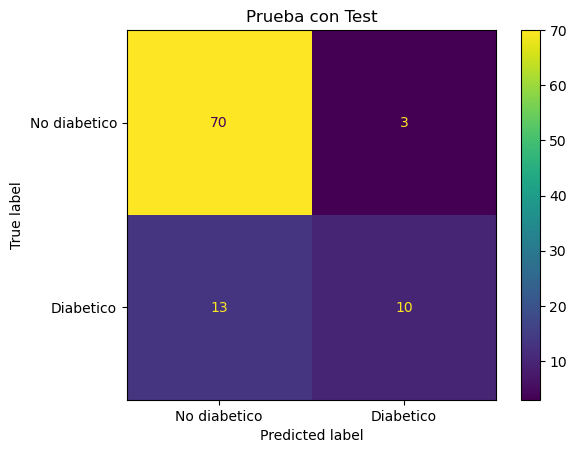

In [420]:
#Una vez se obtuvieran los mejores k, 
# se hizo un análisis para elegir cual será el mejor modelo
k = maxF1['k']

knn = KNeighborsClassifier(n_neighbors= k)

knn.fit(x_train, y_train)
predic = knn.predict(x_test)

print('Acuraccy: ',accuracy_score(y_test, predic))
print('Precision: ',precision_score(y_test, predic))
print('Recall: ',recall_score(y_test, predic))
print('F1: ',f1_score(y_test, predic))

matriz = confusion_matrix(y_test, predic)

matrizConfusion(matriz, "Prueba con Test")






## Regresión Logística


Se divide con todas las columnas

In [421]:
def divideData(dfTraining,dfTesting, dfValidation):
    x_train = dfTraining[['Pregnancies','Glucose',
    'BloodPressure','SkinThickness','Insulin',
    'BMI','DiabetesPedigreeFunction','Age']].values
    
    y_train = dfTraining['Outcome']
    
    x_test = dfTesting[['Pregnancies','Glucose',
    'BloodPressure','SkinThickness','Insulin',
    'BMI','DiabetesPedigreeFunction','Age']].values
    
    y_test = dfTesting['Outcome']
    
    x_val = dfValidation[['Pregnancies','Glucose',
    'BloodPressure','SkinThickness','Insulin',
    'BMI','DiabetesPedigreeFunction','Age']].values
    
    y_val = dfValidation['Outcome']
    
    return  x_train, y_train, x_test, y_test, x_val, y_val
    
x_train, y_train, x_test, y_test, x_val, y_val  = divideData(DataFrameTraining,DataFrameTesting,DataFrameValidation) 


Para empezar, se van a observar los hiperparámetros que se utilizan en la regresión lógistica.

In [422]:
display(LogisticRegression().get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

GridSearch:

Se van a obtener los mejores hiperparámetros para solver y penalty

In [423]:
logisticReg = LogisticRegression(max_iter=1000)

#Con diferentes hiperparametros
params = [{
'solver' : ['lbfgs','newton-cg','sag','saga'],
'penalty' : ['l2',None]}]

#Prueba los diferentes combinaciones de hiperparametros 
params_tuning = GridSearchCV(logisticReg, param_grid = params, 
                            cv = 3, verbose=True, n_jobs=-1)

best_params = params_tuning.fit(x_train,y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [424]:
print(best_params.best_params_)
#Muestra los mejores hiperparametros
 
print (f'Accuracy - : {best_params.score(x_train,y_train):.3f}')


{'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy - : 0.779


In [425]:
#Usando Solver = lbfgs, algoritmo que se usa en el problema de optimizacion.
# penalty = l2

#se busca 
#C = positivo flotante, Regula la fuerza de panlizacion  para regular el overfitting(default 1)
# max_iter= 100(Default)
results = []
solver = 'lbfgs'
penalty = 'l2'
max_iter = [1000,2500]
c = np.arange(0.01,5,0.01)

for iter_val in max_iter:
    
    for c_val in c:
        logisticReg = LogisticRegression(C= c_val, max_iter = iter_val, penalty= penalty, solver =  solver)
        logisticReg.fit(x_train,y_train)
        
        pred = logisticReg.predict(x_val)
        
        accuracy = accuracy_score(y_val, pred)
        precision = precision_score(y_val, pred)
        recall = recall_score(y_val, pred)
        f1 = f1_score(y_val, pred)
        results.append({"Max_iter": iter_val,"C": c_val , "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1})

maxAccuracy = max(results, key = lambda x: x['accuracy'])
print(maxAccuracy)
maxPrecision = max(results, key = lambda x: x['precision'])
maxRecall = max(results, key = lambda x: x['recall'])
maxF1 = max(results, key = lambda x: x['f1'])

print("Max Accuracy")
print(f"Max_iter = {maxAccuracy['Max_iter']}|| C = {maxAccuracy['C']} || Accuracy = {maxAccuracy['accuracy']} || Precision = {maxAccuracy['precision']} || Recall = {maxAccuracy['recall']} || F1 = {maxAccuracy['f1']}")

print("Max Precision")
print(f"Max_iter = {maxPrecision['Max_iter']}|| C = {maxPrecision['C']} || Accuracy = {maxPrecision['accuracy']} || Precision = {maxPrecision['precision']} || Recall = {maxPrecision['recall']} || F1 = {maxPrecision['f1']}")

print("Max Recall")
print(f"Max_iter = {maxRecall['Max_iter']}|| C = {maxRecall['C']} || Accuracy = {maxRecall['accuracy']} || Precision = {maxRecall['precision']} || Recall = {maxRecall['recall']} || F1 = {maxRecall['f1']}")

print("Max F1")
print(f"Max_iter = {maxF1['Max_iter']}|| C = {maxF1['C']} || Accuracy = {maxF1['accuracy']} || Precision = {maxF1['precision']} || Recall = {maxF1['recall']} || F1 = {maxF1['f1']}")



        




{'Max_iter': 1000, 'C': 0.01, 'accuracy': 0.78125, 'precision': 0.7777777777777778, 'recall': 0.5833333333333334, 'f1': 0.6666666666666666}
Max Accuracy
Max_iter = 1000|| C = 0.01 || Accuracy = 0.78125 || Precision = 0.7777777777777778 || Recall = 0.5833333333333334 || F1 = 0.6666666666666666
Max Precision
Max_iter = 1000|| C = 0.01 || Accuracy = 0.78125 || Precision = 0.7777777777777778 || Recall = 0.5833333333333334 || F1 = 0.6666666666666666
Max Recall
Max_iter = 1000|| C = 0.32 || Accuracy = 0.78125 || Precision = 0.7586206896551724 || Recall = 0.6111111111111112 || F1 = 0.676923076923077
Max F1
Max_iter = 1000|| C = 0.32 || Accuracy = 0.78125 || Precision = 0.7586206896551724 || Recall = 0.6111111111111112 || F1 = 0.676923076923077


Prueba con Test(Regresion Logistica)

Acuraccy:  0.8333333333333334
Precision:  0.7692307692307693
Recall:  0.43478260869565216
F1:  0.5555555555555556


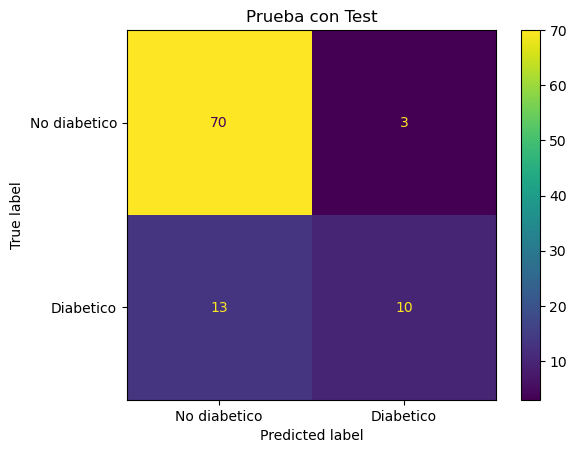

In [426]:
logisticReg = LogisticRegression(C= maxF1['C'], max_iter = maxF1['Max_iter'], penalty= penalty, solver =  solver)
logisticReg.fit(x_train,y_train)

pred = logisticReg.predict(x_test)


matriz = confusion_matrix(y_test, predic)

print('Acuraccy: ',accuracy_score(y_test, predic))
print('Precision: ',precision_score(y_test, predic))
print('Recall: ',recall_score(y_test, predic))
print('F1: ',f1_score(y_test, predic))

matrizConfusion(matriz, "Prueba con Test")
